# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">Reference</a></li>    
</ul>

<a id='intro'></a>
## Introduction

> **Overview**: 

> **TMDb Movie Data**: 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue
>
> -  Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>
> -  There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
>
> - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>
>
> **Analysis questions**:
>
> **Gerneral**:
>
> 1) How has the popularity of drama movies changed over decades?
>
> 1.a) Number of movies released in each decade - Gener Drama
>
> 1.b. Predict the production house which will produce drama movies having high popularity.
>
> 2) Are older movies more popular?
>
> 3) Most popular genres.
>
> 4) Total Revenue vs Release year. 


> ***_Loading Data from csv_***

In [7]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> Based on the question's raised, I have decided to clean the data in such a way that the meaning of the proposed questiones are well analysed and no data is lost. At the end based on the cleaned data we create conclusion. 

### General Properties

In [10]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('tmdb_movies.csv')

#   types and look for instances of missing or possibly errant data.

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [12]:
df.shape

(10866, 21)

## Initial Steps
>
> After checking the properties of the imported file, it is clearly visible that the data types are not corect for the corresponding data sets. Henc I cleaned that along with other required changes. The uneccessary columns were removed. Also since we whose analysis should be as perfect as possible, I have removed all the non available data. 

## Cleaning 
>
>
> - First, I removed the columns which dosen't provide value to the analysis I am making.
> - Next, from the previos check, we knew that the data types are not the way I want it. Hence I am changing it. 
> - Next step is to fix the missing value. 
> - The Budget, revenue and runtime columns cannot be less than 0. We fill those data with the mean because a film cannot have Budget, revenue and runtime as 0
> - Removing duplicates
> - Now we split the columns which is sperated by pipe sysmbol for better analysis. 


In [13]:
# Drop the irrelevant columns

df = df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id'], axis=1)

In [14]:
#Checking the result

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

In [20]:
# Converting the release_date to data datatype. 

df['release_date'] = pd.to_datetime(df['release_date'])

# Convert float to int. (Budget and revenue - adj)

df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

# convert float to int. (Budget and revenue)

df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)

In [21]:
#Checking the result

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   popularity            10866 non-null  float64       
 2   budget                10866 non-null  int64         
 3   revenue               10866 non-null  int64         
 4   original_title        10866 non-null  object        
 5   director              10822 non-null  object        
 6   runtime               10866 non-null  int64         
 7   genres                10843 non-null  object        
 8   production_companies  9836 non-null   object        
 9   release_date          10866 non-null  datetime64[ns]
 10  vote_count            10866 non-null  int64         
 11  vote_average          10866 non-null  float64       
 12  release_year          10866 non-null  int64         
 13  budget_adj      

In [36]:
# Since our analysis consit of Production company, we fill the missing value with Not available for easier analysis. 

df['director'] = df['director'].fillna('NA')
df['production_companies'] = df['production_companies'].fillna('NA')
df['genres'] = df['genres'].fillna('NA')

In [42]:
# Checking the result

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   popularity            10866 non-null  float64       
 2   budget                10866 non-null  int64         
 3   revenue               10866 non-null  int64         
 4   original_title        10866 non-null  object        
 5   director              10866 non-null  object        
 6   runtime               10866 non-null  int64         
 7   genres                10866 non-null  object        
 8   production_companies  10866 non-null  object        
 9   release_date          10866 non-null  datetime64[ns]
 10  vote_count            10866 non-null  int64         
 11  vote_average          10866 non-null  float64       
 12  release_year          10866 non-null  int64         
 13  budget_adj      

In [43]:
# Checking it again.

df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
release_month           0
dtype: int64

In [44]:
# To check if ther are any minimum number

df.min()

id                                                                      5
popularity                                                        6.5e-05
budget                                                                  0
revenue                                                                 0
original_title                                                   $5 a Day
director                                                FrÃ©dÃ©ric Jardin
runtime                                                                 0
genres                                                             Action
production_companies    10th Hole Productions|Anonymous Content|Ambush...
release_date                                          1970-01-03 00:00:00
vote_count                                                             10
vote_average                                                          1.5
release_year                                                         1960
budget_adj                            

In [47]:
df['budget']=df['budget'].replace(0,df['budget'].mean())

df['revenue']=df['revenue'].replace(0,df['revenue'].mean())

df['budget_adj']=df['budget_adj'].replace(0,df['budget_adj'].mean())

df['revenue_adj']=df['revenue_adj'].replace(0,df['revenue_adj'].mean())

df['runtime']=df['runtime'].replace(0,df['runtime'].mean())


In [48]:
# Check

df.min()

id                                                                      5
popularity                                                        6.5e-05
budget                                                                  1
revenue                                                                 2
original_title                                                   $5 a Day
director                                                FrÃ©dÃ©ric Jardin
runtime                                                                 2
genres                                                             Action
production_companies    10th Hole Productions|Anonymous Content|Ambush...
release_date                                          1970-01-03 00:00:00
vote_count                                                             10
vote_average                                                          1.5
release_year                                                         1960
budget_adj                            

In [50]:
# Check for Duplicates

sum(df.duplicated())

1

In [52]:
#Remove duplicates

df.drop_duplicates(keep= "first", inplace=True)

In [53]:
#Check again

sum(df.duplicated())

0

In [54]:
#Column split

df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0])

df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

In [55]:
#Check

df['production_companies'].head(15)

0                          Universal Studios
1                  Village Roadshow Pictures
2                       Summit Entertainment
3                                  Lucasfilm
4                         Universal Pictures
5                        Regency Enterprises
6                         Paramount Pictures
7     Twentieth Century Fox Film Corporation
8                         Universal Pictures
9                       Walt Disney Pictures
10                         Columbia Pictures
11                 Village Roadshow Pictures
12                                 DNA Films
13                         Columbia Pictures
14                            Marvel Studios
Name: production_companies, dtype: object

In [56]:
#check

df['genres'].head(15)

0              Action
1              Action
2           Adventure
3              Action
4              Action
5             Western
6     Science Fiction
7               Drama
8              Family
9              Comedy
10             Action
11    Science Fiction
12              Drama
13             Action
14             Action
Name: genres, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### 1. How has the popularity of drama movies changed over decades?

In [59]:
# Creating a Drama Dataframe

df_drama = df[df['genres'].str.contains("Drama")]
df_production 

In [60]:
#Check the results

df_drama.genres.str.contains(r'Drama').sum() == df_drama['id'].count()

True

If we map the release year in decaded it would be easier to make the analysis as we would have combined the data and present time without loosing the meaning.

In [62]:
#Creating bin

decades = [1960, 1970, 1980, 1990, 2000, 2010, 2020]

decade_names = ['1960', '1970', '1980', '1990', '2000', '2010']

#Creating new column

df_drama['release_decade'] = pd.cut(df['release_year'], decades, labels=decade_names)

df_drama.head()

/Users/udaiyali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_decade
7,286217,7.667400,108000000.0,595380321.0,The Martian,Ridley Scott,141.0,Drama,Twentieth Century Fox Film Corporation,2015-09-30,4572,7.6,2015,99359956.0,547749654.0,9,2010
12,264660,6.118847,15000000.0,36869414.0,Ex Machina,Alex Garland,108.0,Drama,DNA Films,2015-01-21,2854,7.6,2015,13799993.0,33919845.0,1,2010
23,216015,4.710402,40000000.0,569651467.0,Fifty Shades of Grey,Sam Taylor-Johnson,125.0,Drama,Focus Features,2015-02-11,1865,5.3,2015,36799983.0,524079119.0,2,2010
28,314365,4.062293,20000000.0,88346473.0,Spotlight,Tom McCarthy,128.0,Drama,Participant Media,2015-11-06,1559,7.8,2015,18399991.0,81278719.0,11,2010
35,264644,3.557846,6000000.0,35401758.0,Room,Lenny Abrahamson,117.0,Drama,Element Pictures,2015-10-16,1520,8.0,2015,5519997.0,32569603.0,10,2010


In [63]:
#Use groupy to see the drama movies and count their number

df_drama.groupby(['release_decade'], as_index = False)['id'].count()

,release_decade,id
0,1960,78
1,1970,117
2,1980,206
3,1990,443
4,2000,904
5,2010,700


In [64]:
#average popularity by decade

df_drama.groupby(['release_decade'], as_index = False)['popularity'].mean()

,release_decade,popularity
0,1960,0.377707
1,1970,0.523828
2,1980,0.465230
3,1990,0.552554
4,2000,0.529620
5,2010,0.630811


In [65]:

df_1960 = df_drama.query('release_decade == "1960"')
df_1960_mean = df_1960['popularity'].mean()

df_1970 = df_drama.query('release_decade == "1970"')
df_1970_mean = df_1970['popularity'].mean()

df_1980 = df_drama.query('release_decade == "1980"')
df_1980_mean = df_1980['popularity'].mean()

df_1990 = df_drama.query('release_decade == "1990"')
df_1990_mean = df_1990['popularity'].mean()

df_2000 = df_drama.query('release_decade == "2000"')
df_2000_mean = df_2000['popularity'].mean()

df_2010 = df_drama.query('release_decade == "2010"')
df_2010_mean = df_2010['popularity'].mean()

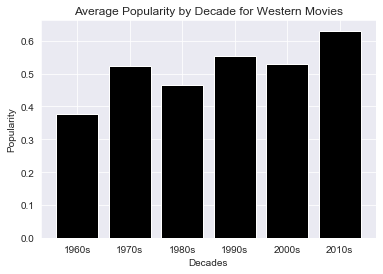

In [158]:
# createa bar chart with labels

locations = [1, 2, 3, 4, 5, 6]
heights = [df_1960_mean, df_1970_mean, df_1980_mean, df_1990_mean, df_2000_mean, df_2010_mean]
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(locations, heights, tick_label=labels, color='#000000')
plt.title('Average Popularity by Decade for Western Movies')
plt.xlabel('Decades')
plt.ylabel('Popularity');

>It can be seen that from the start of 1960 the populariy of Drama movies had increased in a steady phase although we can see that during 1980s and 2000s there was a slight dip in popularity. It might be due to not enough movies being release or maybe the movies which was released was not on par with what people saw. Let us further analyse this on why there was a dip in performanace.

### 1.a.Number of movies released in each decade - Gener Drama

No handles with labels found to put in legend.


Sum of Released Movies: 
  release_decade   id
0           1960   78
1           1970  117
2           1980  206
3           1990  443
4           2000  904
5           2010  700


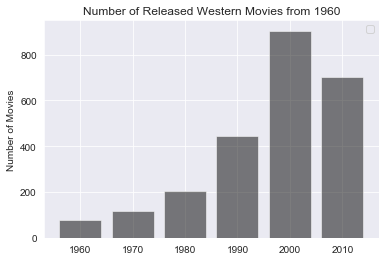

In [77]:
df_drama_sum = df_drama.groupby(['release_decade'], as_index = False)['id'].count()

years = ('1960', '1970', '1980', '1990', '2000', '2010')
pos = np.arange(0, 6, 1)
plt.xticks(pos, years)
bar_heights = df_drama_sum['id']

print('Sum of Released Movies: ')
print(df_drama_sum)

plt.bar(x = years, color='#000000', alpha=.5, height = bar_heights)

plt.ylabel('Number of Movies')
plt.title('Number of Released Western Movies from 1960')

plt.legend()
plt.show()

> We can see that the number of movies produced had been steadily increasing year on yearn but after 2000 we see a drop for the first time since the start of 1960. We cannot really determine the reason why there was a dip in popularity for drama geners during 1980 and 2000. 
>
>
>But one analysis is that, eventhough the number of movies produced had doubled every year till 2000, the popularity for this gener had not kept up the pace but rather remained consistend. 
>
### 1.b. Predict the production house which will produce drama movies having high popularity. 

In [107]:
#only the Production company for gener drama

production_companies = df_drama.loc[:,['production_companies']]

In [110]:
#Check 

production_companies.head()

,production_companies
7,Twentieth Century Fox Film Corporation
12,DNA Films
23,Focus Features
28,Participant Media
35,Element Pictures


In [114]:
#Merging the drama and production companies. We require only the produciton company for Drama

df_comp = pd.merge(df_drama , production_companies , how = 'inner')

In [115]:
#check

df_comp.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_decade,gross_profit_adj
0,286217,7.6674,108000000.0,595380321.0,The Martian,Ridley Scott,141.0,Drama,Twentieth Century Fox Film Corporation,2015-09-30,4572,7.6,2015,99359956.0,547749654.0,9,2010,448389698.0
1,286217,7.6674,108000000.0,595380321.0,The Martian,Ridley Scott,141.0,Drama,Twentieth Century Fox Film Corporation,2015-09-30,4572,7.6,2015,99359956.0,547749654.0,9,2010,448389698.0
2,286217,7.6674,108000000.0,595380321.0,The Martian,Ridley Scott,141.0,Drama,Twentieth Century Fox Film Corporation,2015-09-30,4572,7.6,2015,99359956.0,547749654.0,9,2010,448389698.0
3,286217,7.6674,108000000.0,595380321.0,The Martian,Ridley Scott,141.0,Drama,Twentieth Century Fox Film Corporation,2015-09-30,4572,7.6,2015,99359956.0,547749654.0,9,2010,448389698.0
4,286217,7.6674,108000000.0,595380321.0,The Martian,Ridley Scott,141.0,Drama,Twentieth Century Fox Film Corporation,2015-09-30,4572,7.6,2015,99359956.0,547749654.0,9,2010,448389698.0


In [116]:
# Grouping

grouped_by_popularity=df_comp.groupby('production_companies').sum()

In [129]:
grouped_by_popularity.sort_values(by = 'popularity',ascending=False).loc[:,'popularity'][0:10]

production_companies
Not Available                             10924.476300
Paramount Pictures                         6524.359757
Universal Pictures                         4279.136224
Columbia Pictures                          2973.401100
Miramax Films                              1391.961620
Twentieth Century Fox Film Corporation     1055.429670
New Line Cinema                             990.939312
Warner Bros.                                946.986495
BBC Films                                   700.283238
Fox Searchlight Pictures                    535.684800
Name: popularity, dtype: float64

>From the above data we can see that Paramount Pictures are the most famous for drama movies and if the movie is produced by Parmount Pictures, then we can say with confidence that it will be popular among the viewers. 

### 2. Are older movies more popular?

In [130]:
#group data by release year take the median of all the numeric columns

groupby_year=df.groupby('release_year').median()

In [131]:
#get release year column back into dataframe for visualization

groupby_year['release_year'] = groupby_year.index.get_level_values(0)

<Figure size 936x648 with 0 Axes>

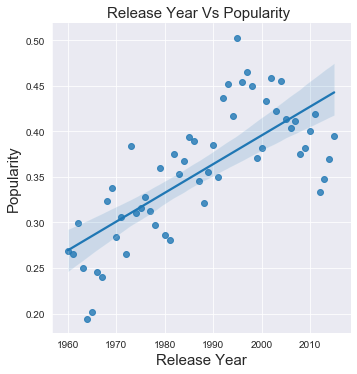

In [132]:
#visualizaiton

plt.figure(figsize = (13,9))
sns.lmplot(x = 'release_year', y = 'popularity', data = groupby_year); #plot a lineplot 
plt.xlabel('Release Year', fontsize = 15); 
plt.ylabel('Popularity', fontsize = 15);
plt.title('Release Year Vs Popularity ',fontsize = 15);

>It can be seen that that newer movies had been popular compared to older movies. 

### 3. Most popular genres.

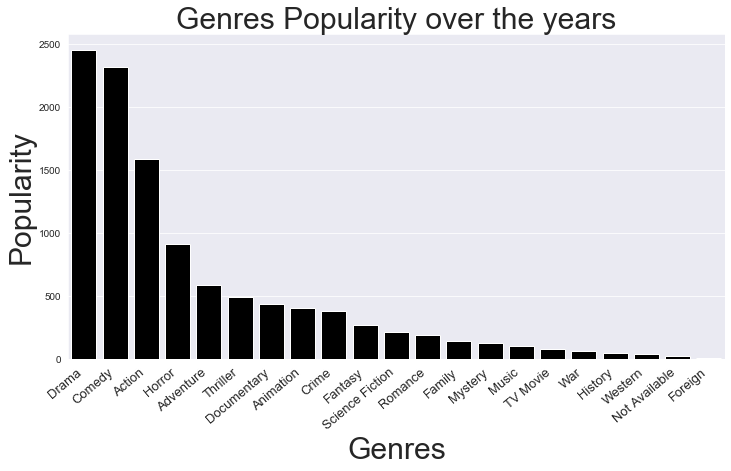

In [163]:
plt.figure(figsize = (10,6)) #set a figure size
ax = sns.countplot(x="genres", data= df, order = df['genres'].value_counts().index, color='#000000')
#rotate x-tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize = 13)
plt.tight_layout()
#gives names to x-axis , y-axis & the title
plt.xlabel('Genres' , fontsize = 30)
plt.ylabel('Popularity' , fontsize = 30)
plt.title('Genres Popularity over the years',fontsize = 30)
plt.show()

>It can be seen that Drama is the most popular genres

### 3.  Total Revenue vs Release year

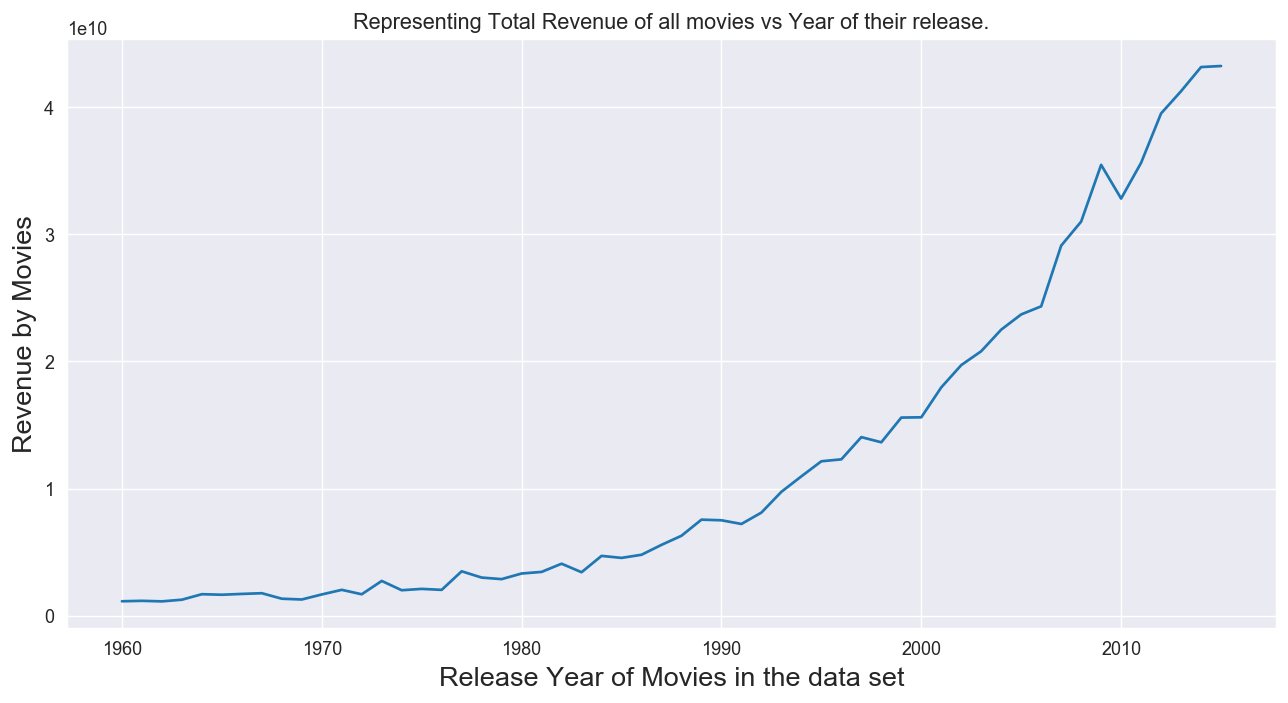

In [167]:
#let us use Line plot for this analysis
#Since we want to know the total revenue of movies for every year therefore we have to sum up all the movies of a particular year
revenue_year = df.groupby('release_year')['revenue'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 15)
#on y-axis
plt.ylabel('Revenue by Movies', fontsize = 15)
#title of the line plot
plt.title('Representing Total Revenue of all movies vs Year of their release.')

#plotting the graph
plt.plot(revenue_year)

#displaying the line plot
plt.show()

> It can be seen that with revenue increased with increasing years. 

<a id='conclusions'></a>
## Conclusions

> The most popular gener, Drama had been throughly analyzed and it can be seen that the popularity for drama movies year on year had been fluctuation but overall they are the most popular. We can alos see that the number of drama movies released had doubled every decade except for the last one. 
>
> The three production companies which produced movies that are popular among the viewers. Hence we can saftley say the movie produced by theses companies would be popular but this is an assumption from the past data. The companies are
>
> - Paramount Pictures
> - Universal Pictures  
> - Columbia Pictures 
>
>
> We also saw the popularity of movies. As the movie industry got bigger so did the popularity. Hence from the results we can see that the newer movies are much popular among the viewres that the old movies. From the last data analysis, we can also see that the revenue for newer movies are much higher than the older movies. 
>
> The most popular geners among the viewers are Drama which is closly followed by Comedy.
>
>
***Limitation***

>The prediction on the movies being produced by a specific production house will be popular is not full proof. Since we have filled in the mean value for missing value in budget, revenue the data will affect our analysis. The result is not free of errors due to the above mentioned reason.  

<a id='reference'></a>
## Reference
>
> 1) https://stackoverflow.com/questions/50510136/convert-object-to-a-datetime
>
> 2) https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
>
> 3) https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html
